In [549]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px

In [550]:
pd.set_option('display.max_columns', None)

In [ ]:
listings = pd.read_csv('listings.csv.gz')
listings.head(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,27886,https://www.airbnb.com/rooms/27886,20250609011745,2025-06-17,city scrape,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.",https://a0.muscache.com/pictures/02c2da9d-660e...,97647,https://www.airbnb.com/users/show/97647,Flip,2010-03-23,"Amsterdam, Netherlands","Marjan works in ""eye"" the dutch filmmuseum, an...",within an hour,100%,98%,t,https://a0.muscache.com/im/users/97647/profile...,https://a0.muscache.com/im/users/97647/profile...,Westelijke Eilanden,1.0,1.0,"['email', 'phone']",t,t,"Amsterdam, North Holland, Netherlands",Centrum-West,NaN,52.38761,4.89188,Private room in houseboat,Private room,2,1.5,1.5 baths,1.0,1.0,"[""Coffee maker: Nespresso"", ""Shampoo"", ""Paid s...",$132.00,3,356,3,3,30,30,3.0,30.0,NaN,t,0,0,0,53,2025-06-17,302,28,1,53,26,218,28776.0,2012-01-09,2025-06-11,4.92,4.90,4.94,4.95,4.92,4.90,4.78,0363 974D 4986 7411 88D8,f,1,0,1,0,1.85
1,28871,https://www.airbnb.com/rooms/28871,20250609011745,2025-06-17,city scrape,Comfortable double room,Basic bedroom in the center of Amsterdam.,"Flower market , Leidseplein , Rembrantsplein",https://a0.muscache.com/pictures/160889/362340...,124245,https://www.airbnb.com/users/show/124245,Edwin,2010-05-13,"Amsterdam, Netherlands",Hi,within an hour,100%,99%,t,https://a0.muscache.com/im/pictures/user/9986b...,https://a0.muscache.com/im/pictures/user/9986b...,Amsterdam Centrum,2.0,2.0,"['email', 'phone']",t,t,"Amsterdam, North Holland, Netherlands",Centrum-West,NaN,52.36775,4.89092,Private room in rental unit,Private room,2,1.0,1 shared bath,1.0,1.0,"[""Carbon monoxide alarm"", ""Wifi"", ""Heating"", ""...",$78.00,2,730,1,2,730,730,2.0,730.0,NaN,t,1,2,4,130,2025-06-17,710,93,9,31,96,255,19890.0,2010-08-22,2025-06-16,4.88,4.90,4.87,4.94,4.94,4.94,4.84,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,3.93
2,29051,https://www.airbnb.com/rooms/29051,20250609011745,2025-06-17,city scrape,Comfortable single / double room,This room can also be rented as a single or a ...,the street is quite lively especially on weeke...,https://a0.muscache.com/pictures/162009/bd6be2...,124245,https://www.airbnb.com/users/show/124245,Edwin,2010-05-13,"Amsterdam, Netherlands",Hi,within an hour,100%,99%,t,https://a0.muscache.com/im/pictures/user/9986b...,https://a0.muscache.com/im/pictures/user/9986b...,Amsterdam Centrum,2.0,2.0,"['email', 'phone']",t,t,"Amsterdam, North Holland, Netherlands",Centrum-Oost,NaN,52.36584,4.89111,Private room in condo,Private room,2,1.0,1 shared bath,1.0,1.0,"[""Carbon monoxide alarm"", ""Wifi"", 

In [552]:
listings.shape

(10168, 79)

In [553]:
cols = listings.columns.tolist()
print(cols)

['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availabil

In [554]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10168 entries, 0 to 10167
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            10168 non-null  int64  
 1   listing_url                                   10168 non-null  object 
 2   scrape_id                                     10168 non-null  int64  
 3   last_scraped                                  10168 non-null  object 
 4   source                                        10168 non-null  object 
 5   name                                          10168 non-null  object 
 6   description                                   9859 non-null   object 
 7   neighborhood_overview                         5258 non-null   object 
 8   picture_url                                   10168 non-null  object 
 9   host_id                                       10168 non-null 

In [615]:
# Deleting empty data 
listings = listings.drop(columns=['neighbourhood_group_cleansed'])

In [616]:
listings_2 = pd.read_csv('listings.csv', index_col = 'id')
cols2 = listings.columns.tolist()
print(cols2)

['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped

In [617]:
c = list(set(cols2) - set(cols))
print(c)

# There are no differences 

[]


In [618]:
neighbour = pd.read_csv('neighbourhoods.csv')
neighbour

# The of neighbourhoods


,neighbourhood_group,neighbourhood
0,NaN,Bijlmer-Centrum
1,NaN,Bijlmer-Oost
2,NaN,Bos en Lommer
3,NaN,Buitenveldert - Zuidas
4,NaN,Centrum-Oost
5,NaN,Centrum-West
6,NaN,De Aker - Nieuw Sloten
7,NaN,De Baarsjes - Oud-West
8,NaN,De Pijp - Rivierenbuurt
9,NaN,Gaasperdam - Driemond


In [613]:
reviews = pd.read_csv('reviews.csv.gz', index_col='id')
reviews.head(5)

,listing_id,date,reviewer_id,reviewer_name,comments
id,,,,,
4796982,1182656,2013-05-26,6511386,Karim,Marc was a very friendly guy. When we got to h...
4952124,1182656,2013-06-03,1409171,Tomas,Great. Very good location. Friendly host. Accu...
5014762,1182656,2013-06-07,6444385,Charles,Marc is an incredibly nice person and a gracio...
5073754,1182656,2013-06-10,3333785,Laura,Marc's apartment is a beautiful place located ...
5091378,1182656,2013-06-11,6608456,Sally,This was our first time using Airbnb and were ...


In [560]:
reviews.shape

(483680, 5)

In [561]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 483680 entries, 4796982 to 1433979383777632974
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     483680 non-null  int64 
 1   date           483680 non-null  object
 2   reviewer_id    483680 non-null  int64 
 3   reviewer_name  483679 non-null  object
 4   comments       483650 non-null  object
dtypes: int64(2), object(3)
memory usage: 22.1+ MB


In [614]:
calendar = pd.read_csv('calendar.csv.gz', compression='gzip', parse_dates=['date'])
calendar.head(5)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,2818,2025-03-03,f,$89.00,NaN,3.0,1125.0
1,2818,2025-03-04,t,$89.00,NaN,3.0,1125.0
2,2818,2025-03-05,t,$89.00,NaN,3.0,1125.0
3,2818,2025-03-06,t,$89.00,NaN,3.0,1125.0
4,2818,2025-03-07,t,$89.00,NaN,3.0,1125.0


In [563]:
calendar['price'] = calendar['price'].replace('[$,€]', '', regex=True).astype(float)

In [564]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3673991 entries, 0 to 3673990
Data columns (total 7 columns):
 #   Column          Dtype         
---  ------          -----         
 0   listing_id      int64         
 1   date            datetime64[ns]
 2   available       object        
 3   price           float64       
 4   adjusted_price  float64       
 5   minimum_nights  float64       
 6   maximum_nights  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 196.2+ MB


In [566]:
# Numbers of accommodations by neighbourhood 

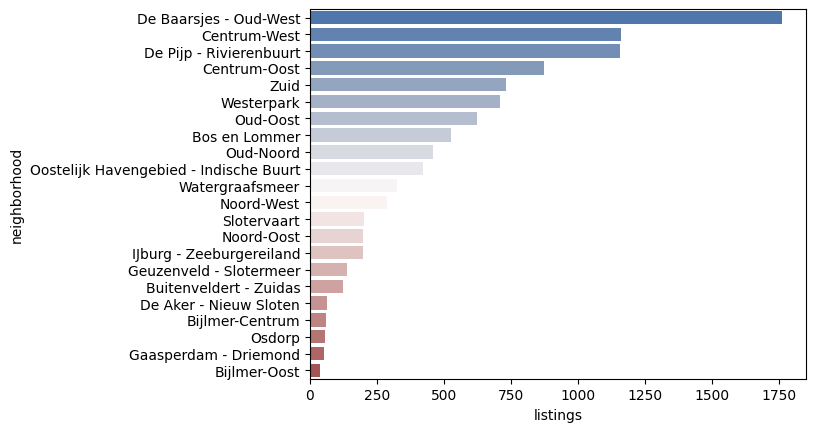

In [567]:
num_nei = listings['neighbourhood_cleansed'].value_counts().sort_values(ascending=False)
nei_df = num_nei.reset_index()
nei_df.columns = ['neighborhood', 'listings']
ax = sns.barplot(nei_df, y='neighborhood', x='listings', hue='neighborhood', palette='vlag', legend=False)


In [568]:
nei_counts = listings.groupby('neighbourhood_cleansed')[['latitude', 'longitude']].mean()
nei_counts['count'] = listings.groupby('neighbourhood_cleansed').size()
nei_counts = nei_counts.reset_index()
# nei_counts

fig = px.scatter_mapbox(
    nei_counts,
    lat="latitude",
    lon="longitude",
    size='count', 
    size_max=30,
    hover_name="neighbourhood_cleansed",
    hover_data={'count' : True, 'latitude' : False, 'longitude' : False},
    zoom=11,
    height=600
)

fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

In [570]:
nei_counts_d = nei_counts[['neighbourhood_cleansed', 'count']]

In [619]:
fig = px.pie(
    data_frame = nei_counts_d,
    names='neighbourhood_cleansed',
    values='count',
    title='Percentage of placements by neighbourhood',
    hole=0.3 
)
fig.show()

In [572]:
# Average price by neighbourhoods 

In [573]:
listings['price'] = listings['price'].replace('[$,€]', '', regex=True).astype(float)

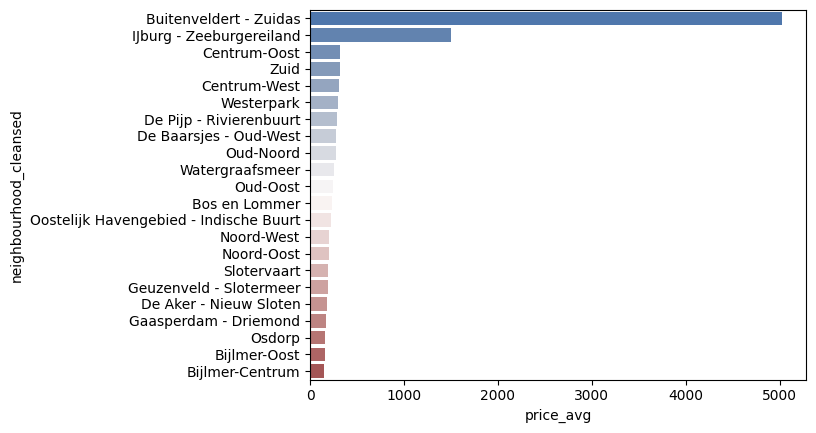

In [574]:
nei_counts['price_avg'] = listings.groupby('neighbourhood_cleansed')['price'].mean().reset_index()['price'].round(2)
nei_counts = nei_counts.sort_values(by='price_avg', ascending=False)

ax = sns.barplot(nei_counts, y='neighbourhood_cleansed', x='price_avg', hue='neighbourhood_cleansed', palette='vlag', legend=False)

In [ ]:
# The large outburst in Zuidas and Ijburg 

In [576]:
# The median, which is the average value, in this case more accurately reflects the main trend.

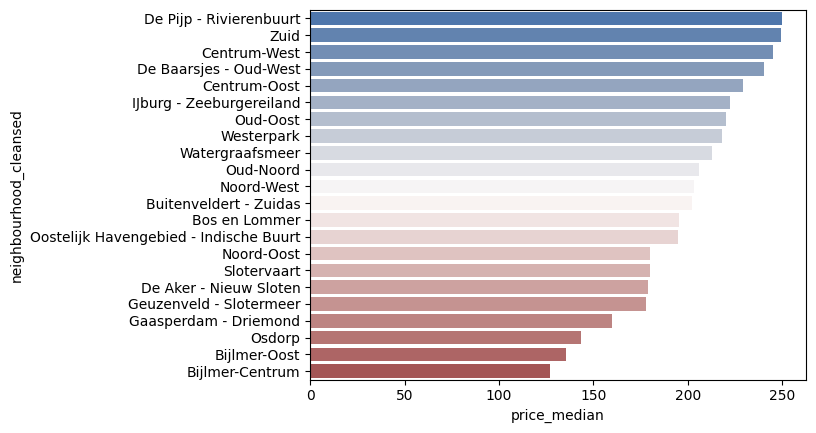

In [577]:
nei_counts['price_median'] = listings.groupby('neighbourhood_cleansed')['price'].median().reset_index()['price'].round(2)
nei_counts = nei_counts.sort_values(by='price_median', ascending=False)

ax = sns.barplot(nei_counts, y='neighbourhood_cleansed', x='price_median', hue='neighbourhood_cleansed', palette='vlag', legend=False)

In [578]:
fig = px.scatter_mapbox(
    nei_counts,
    lat="latitude",
    lon="longitude",
    size='price_median', 
    size_max=30,
    hover_name="neighbourhood_cleansed",
    hover_data={'price_median' : True, 'latitude' : False, 'longitude' : False},
    zoom=11,
    height=600
)

fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

In [579]:
# Types of accommodations

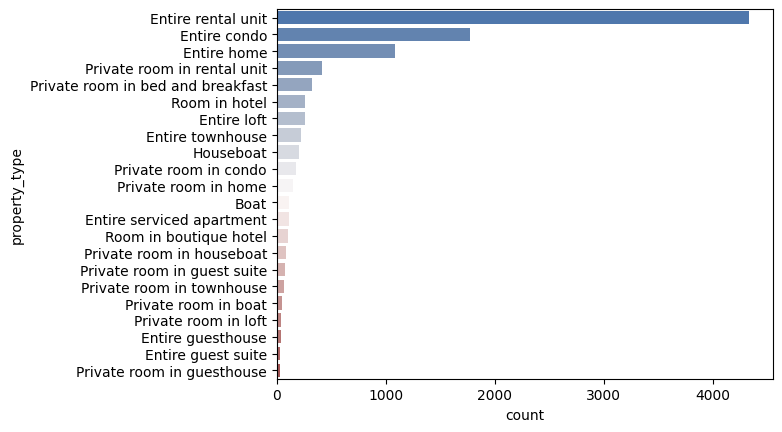

In [580]:
type_acc = listings['property_type'].value_counts()
type_acc_df = type_acc.reset_index()
# type_acc_df['count'].median()
# type_acc_df.shape
top_types = type_acc_df[type_acc_df['count'] > 20]

ax1 = sns.barplot(top_types, y='property_type', x='count', hue='property_type', palette='vlag', legend=False)

In [581]:
# Numbers of accomodations by hosts
# Top of hosts 

In [623]:
top_hosts = listings.groupby('host_id')['host_since'].size().reset_index().sort_values(by='host_since', ascending=False).rename(columns={'host_since' : 'count'}).head(20)
top_hosts = top_hosts.merge(
    listings[['host_id', 'host_url', 'host_name']], 
    how='left', 
    on='host_id'
)

In [629]:
fig = px.pie(
    data_frame=top_hosts,
    names='host_id',
    values='count',
    title='TOP-20 of hosts by number of accommodations', 
    hover_data=['host_name'], 
    labels={'host_name' : 'host name ', 'host_id' : 'host_id ', 'count' : 'number of listings '},
    hole=0.3
)
fig.show()

In [630]:
# Average accomodation capacity  
# Price dependence on capacity

In [587]:
capacity_plot = listings.groupby('accommodates')['price'].mean().round(2).reset_index()
capacity_plot

,accommodates,price
0,1,96.24
1,2,297.04
2,3,239.50
3,4,472.99
4,5,333.59
5,6,759.38
6,7,689.73
7,8,585.86
8,9,720.00
9,10,417.33


In [588]:
fig = px.scatter(
    capacity_plot,
    x='accommodates',
    y='price',
    title='Price per night depending on capacity',
    labels={'accommodates': 'Capacity', 'price': 'Price per night (€)'},
    opacity=0.5
)
fig.show()

In [589]:
neighbourhood_reviews = listings.groupby('neighbourhood_cleansed')[['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 
                                                                    'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 
                                                                    'review_scores_value']].mean().round(2).reset_index()
neighbourhood_reviews = neighbourhood_reviews.sort_values(by='review_scores_rating', ascending=False)
neighbourhood_reviews_melt = neighbourhood_reviews.melt(id_vars='neighbourhood_cleansed', 
                                                        value_vars=['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 
                                                                    'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value'],
                                                        var_name='rating_types', 
                                                        value_name='review_value') 


fig = px.bar(
    neighbourhood_reviews_melt,
    x='neighbourhood_cleansed',
    y='review_value',
    color='rating_types',
    barmode='group',
    title='Average ratings by neighbourhoods'
)

fig.update_layout(xaxis_tickangle=-45,
                  xaxis_title = "Neighbourhoods",
                  yaxis_title = "Average rating", 
                  title_font_size = 20)
fig.show()

In [590]:
# neighbourhood_reviews.sort_values(by='review_scores_accuracy', ascending=False).head(5)
# neighbourhood_reviews.sort_values(by='review_scores_cleanliness', ascending=False).head(5)
# neighbourhood_reviews.sort_values(by='review_scores_communication', ascending=False).head(5)
neighbourhood_reviews.sort_values(by='review_scores_location', ascending=False).head(5)

,neighbourhood_cleansed,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
5,Centrum-West,4.81,4.82,4.77,4.88,4.88,4.93,4.63
4,Centrum-Oost,4.81,4.83,4.77,4.88,4.89,4.89,4.62
8,De Pijp - Rivierenbuurt,4.85,4.86,4.79,4.91,4.92,4.88,4.66
21,Zuid,4.88,4.88,4.82,4.91,4.92,4.86,4.70
7,De Baarsjes - Oud-West,4.87,4.88,4.80,4.91,4.93,4.84,4.68


In [591]:
# Activities by years / months 

In [592]:
reviews['date'] = pd.to_datetime(reviews['date'])
reviews['year'] = reviews['date'].dt.year
reviews['month'] = reviews['date'].dt.month_name()

In [593]:
year_reviews = reviews.groupby('year')['listing_id'].count().reset_index().rename(columns={'listing_id' : 'num_reviews'})
months_reviews = reviews.groupby(['year', 'month'])['listing_id'].count().reset_index().rename(columns={'listing_id' : 'num_reviews'})

In [594]:
fig = px.bar(
    year_reviews,
    x='year',
    y='num_reviews',
    title='Number of reviews by years'
)


fig.update_layout(xaxis_title = "Year",
                  yaxis_title = "Number of reviews", 
                  title_font_size = 20)

fig.show()

In [ ]:
# 2020 is the begining of the Covid19
# In 2022 people started travelling again
# The trend towards an increase of travel and short-term rent 

In [596]:
month_mean = months_reviews.groupby('month')['num_reviews'].mean().round(2).reset_index().rename(columns={'num_reviews' : 'mean'}).sort_values(by='mean')

In [597]:
fig = px.bar(
    month_mean,
    x='month',
    y='mean',
    title='Average ratings by neighbourhoods'
)

fig.update_layout(xaxis_title = "Month",
                  yaxis_title = "Average number of reviews", 
                  title_font_size = 20)

fig.show()

In [631]:
# Quiet months are December, January, Februeary - Christmas, New Year, holidays
# The hot month is May - it's warm, not hot and not cold, lots of holidays for kids and adults 

In [599]:
# Connection of price with rating

In [600]:
reviews_count = reviews.groupby('listing_id').size().reset_index(name='review_count')
list_price = listings[['id', 'price']]
listings_reviews = list_price.merge(reviews_count, how='left', left_on='id', right_on='listing_id')
listings_reviews['review_count'] = listings_reviews['review_count'].fillna(0).astype(int)
listings_reviews = listings_reviews[listings_reviews['review_count'] > 0]


In [601]:
fig = px.scatter(
    listings_reviews, 
    x = 'review_count', 
    y = 'price', 
    hover_data = 'id', 
    title = 'The relationship between price and number of review'
)

fig.show()

In [602]:
# there is no clear relationship between the price and the number of reviews

In [603]:
# calendar 

In [604]:
calendar['year'] = calendar['date'].dt.year
calendar['month'] = calendar['date'].dt.month_name()
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,year,month
0,2818,2025-03-03,f,89.0,NaN,3.0,1125.0,2025,March
1,2818,2025-03-04,t,89.0,NaN,3.0,1125.0,2025,March
2,2818,2025-03-05,t,89.0,NaN,3.0,1125.0,2025,March
3,2818,2025-03-06,t,89.0,NaN,3.0,1125.0,2025,March
4,2818,2025-03-07,t,89.0,NaN,3.0,1125.0,2025,March


In [606]:
# Procent of available days     

In [607]:
(calendar['available'].value_counts(normalize=True)['t'] * 100).round(2)

23.35

In [ ]:
# The occupancy rate in Amsterdam is high — 77% which indicates high demand and popularity among tourists. 
# This may also indicate a potential shortage of available accommodations on the market

In [632]:
listings.head(3)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,27886,https://www.airbnb.com/rooms/27886,20250609011745,2025-06-17,city scrape,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.",https://a0.muscache.com/pictures/02c2da9d-660e...,97647,https://www.airbnb.com/users/show/97647,Flip,2010-03-23,"Amsterdam, Netherlands","Marjan works in ""eye"" the dutch filmmuseum, an...",within an hour,100%,98%,t,https://a0.muscache.com/im/users/97647/profile...,https://a0.muscache.com/im/users/97647/profile...,Westelijke Eilanden,1.0,1.0,"['email', 'phone']",t,t,"Amsterdam, North Holland, Netherlands",Centrum-West,52.38761,4.89188,Private room in houseboat,Private room,2,1.5,1.5 baths,1.0,1.0,"[""Coffee maker: Nespresso"", ""Shampoo"", ""Paid s...",$132.00,3,356,3,3,30,30,3.0,30.0,NaN,t,0,0,0,53,2025-06-17,302,28,1,53,26,218,28776.0,2012-01-09,2025-06-11,4.92,4.90,4.94,4.95,4.92,4.90,4.78,0363 974D 4986 7411 88D8,f,1,0,1,0,1.85
1,28871,https://www.airbnb.com/rooms/28871,20250609011745,2025-06-17,city scrape,Comfortable double room,Basic bedroom in the center of Amsterdam.,"Flower market , Leidseplein , Rembrantsplein",https://a0.muscache.com/pictures/160889/362340...,124245,https://www.airbnb.com/users/show/124245,Edwin,2010-05-13,"Amsterdam, Netherlands",Hi,within an hour,100%,99%,t,https://a0.muscache.com/im/pictures/user/9986b...,https://a0.muscache.com/im/pictures/user/9986b...,Amsterdam Centrum,2.0,2.0,"['email', 'phone']",t,t,"Amsterdam, North Holland, Netherlands",Centrum-West,52.36775,4.89092,Private room in rental unit,Private room,2,1.0,1 shared bath,1.0,1.0,"[""Carbon monoxide alarm"", ""Wifi"", ""Heating"", ""...",$78.00,2,730,1,2,730,730,2.0,730.0,NaN,t,1,2,4,130,2025-06-17,710,93,9,31,96,255,19890.0,2010-08-22,2025-06-16,4.88,4.90,4.87,4.94,4.94,4.94,4.84,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,3.93
2,29051,https://www.airbnb.com/rooms/29051,20250609011745,2025-06-17,city scrape,Comfortable single / double room,This room can also be rented as a single or a ...,the street is quite lively especially on weeke...,https://a0.muscache.com/pictures/162009/bd6be2...,124245,https://www.airbnb.com/users/show/124245,Edwin,2010-05-13,"Amsterdam, Netherlands",Hi,within an hour,100%,99%,t,https://a0.muscache.com/im/pictures/user/9986b...,https://a0.muscache.com/im/pictures/user/9986b...,Amsterdam Centrum,2.0,2.0,"['email', 'phone']",t,t,"Amsterdam, North Holland, Netherlands",Centrum-Oost,52.36584,4.89111,Private room in condo,Private room,2,1.0,1 shared bath,1.0,1.0,"[""Carbon monoxide alarm"", ""Wifi"", ""Heating"", ""...",$70.00,2,730,1,2,730,

In [641]:
calendar_neigh = calendar.merge(listings[['id', 'neighbourhood_cleansed']], left_on='listing_id', right_on='id', how='left')
calendar_neigh = calendar_neigh.dropna(subset=['id'])
calendar_neigh.head(5)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,id,neighbourhood_cleansed
365,27886,2025-03-03,f,$155.00,NaN,3.0,30.0,27886.0,Centrum-West
366,27886,2025-03-04,f,$155.00,NaN,3.0,30.0,27886.0,Centrum-West
367,27886,2025-03-05,f,$155.00,NaN,3.0,30.0,27886.0,Centrum-West
368,27886,2025-03-06,f,$155.00,NaN,3.0,30.0,27886.0,Centrum-West
369,27886,2025-03-07,f,$155.00,NaN,3.0,30.0,27886.0,Centrum-West


In [ ]:
# The occupancy of neighbourhoods
occupancy_neigh = calendar_neigh.groupby('neighbourhood_cleansed').agg(
    total_days = ('available', 'count'),
    unavailable_days = ('available', lambda x: (x == 'f').sum())
)
occupancy_neigh['occupancy_rate'] = (occupancy_neigh['unavailable_days'] / occupancy_neigh['total_days']).round(2)
occupancy_neigh = occupancy_neigh.sort_values(by='occupancy_rate', ascending=False)

,total_days,unavailable_days,occupancy_rate
neighbourhood_cleansed,,,
Bos en Lommer,175930,148368,0.84
Slotervaart,67525,56446,0.84
Watergraafsmeer,105480,87803,0.83
Oostelijk Havengebied - Indische Buurt,138335,113151,0.82
Westerpark,239075,193366,0.81
Oud-Oost,214255,173313,0.81
Bijlmer-Oost,12775,10291,0.81
De Baarsjes - Oud-West,594947,476640,0.80
Noord-West,97820,77943,0.80
